# Problem Statement 

**SENTIMENT ANALYSIS** - Sentiment analysis studies the subjective information in an
expression, that is, the opinions, appraisals, emotions, or attitudes towards a topic, person or
entity. Expressions can be classified as positive, negative, or neutral. For example: “I really
like the new design of your website!” → Positive.

You are provided with a dataset of the 'restraunt review' taken from kaggle. Build a  machine learning model by using Support Vector Classifier and Count Vectorizer using two methods to predict the review as either positive or negative. 

You are supposed to
1. Create a dataframe
2. process the data and do visualizations (represent using matplotlib / seaborn the number
of positive reviews and negative reviews)
3. create svc model and count vectorizer separately (method 1)
4. (method 2)create a pipeline with Vectorization model and ML algorithm to predict the
final sentiment.
5. Use joblib to create and save it as a model (joblib is similar to pickle)
6. Using the new model created using joblib,predict the output of a new review
Create a 1 page word document report about sentiment analysis and twitter sentiments
(own words/sentences)

In [ ]:
import pandas as pd 


In [ ]:
df = pd.read_table('/content/drive/MyDrive/Major Project- R.S.Sreenivasan/Restaurant_Reviews.tsv') #Importing the required dataframe after downloading the kaggle dataset and mounting it on a drive. 
df


,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [ ]:
df.info() #Data Cleaning and Adjustment if required

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
df['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

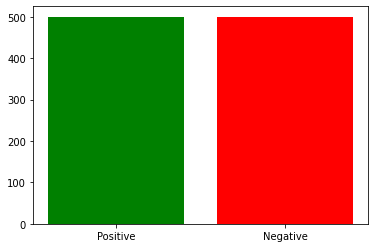

In [ ]:
import matplotlib.pyplot as plt
name = ['Positive','Negative']
height = [500,500]
c1 = ['green','red']
plt.bar(name,height,color = c1)
plt.show() 

In [ ]:
x = df['Review'].values
y = df['Liked'].values


In [ ]:
#train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 6,test_size = 0.2)

In [ ]:
x_train.shape

(800,)

In [ ]:
x_test.shape

(200,)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(stop_words = 'english')
x_train_vect = v.fit_transform(x_train)
x_test_vect = v.transform(x_test)



In [ ]:
x_train_vect.toarray() #A sparse matrix is shown via toarray

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.svm import SVC
model = SVC()

In [ ]:
x.ndim # We need to make this 2D since sklearn only works with two dimensions

1

In [ ]:
model.fit(x_train_vect, y_train)

SVC()

In [ ]:
y_pred1 = model.predict(x_test_vect)
y_pred1

array([0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0])

In [ ]:
y_test

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred1, y_test)*100

81.5

In [ ]:
# ACCURACY FOR SVC- 81.5
#to test the output
test = v.transform([df['Review'][860]])
model.predict(test)


array([1])

In [ ]:
#PIPELINE Method
from sklearn.pipeline import make_pipeline
model1 = make_pipeline(CountVectorizer(), SVC())

model1.fit(x_train, y_train)

y_pred1 = model1.predict(x_test)
y_pred1


array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0])

In [ ]:
accuracy_score(y_pred1, y_test)*100

81.5

In [ ]:
#SVC Pipelining once again yields an accuracy of 81.5

model1.predict([df['Review'][860]])

array([1])

In [ ]:
#JOBLIB - For Persistance of the model. The selected model is the pipeline model

import joblib
joblib.dump(model1,'Positive-Negative')

['Positive-Negative']

In [ ]:
import joblib
reload_model = joblib.load('Positive-Negative')

In [ ]:
#Prediction using Joblib model Example
reload_model.predict(['Great ambience and wonderful waiting service. Heavily reccomended'])

array([1])

In [ ]:
reload_model.predict(['The food was cold. Really bad. Will not reccomend going there'])

array([0])